SINGLE SYSTEM:

QISKIT IMPLEMENTATIONS:

In [2]:
from qiskit import  __version__
print(__version__)

1.3.2


In [3]:
# vectors and matricies
import numpy as np

ket0 = np.array([[1],[0]])
ket1 = np.array([[0],[1]])

print(ket0 / 2 + ket1 / 2)

[[0.5]
 [0.5]]


In [4]:
M1 = np.array([[1, 1], [0, 0]])
M2 = np.array([[1, 0], [0, 1]])
M = M1 / 2 + M2 / 2
print(M)

[[1.  0.5]
 [0.  0.5]]


In [5]:
print(np.matmul(M1, ket1))
print(np.matmul(M1, M2))
print(np.matmul(M, M))

[[1]
 [0]]
[[1 1]
 [0 0]]
[[1.   0.75]
 [0.   0.25]]


In [6]:
from qiskit.visualization import array_to_latex

display(array_to_latex(np.matmul(M1, ket1)))
display(array_to_latex(np.matmul(M1, M2)))
display(array_to_latex(np.matmul(M, M)))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [7]:
# state vectors, measurments, operations
from qiskit.quantum_info import Statevector
from numpy import sqrt

u = Statevector([1/sqrt(2), 1/sqrt(2)])
v = Statevector([(1+2.0j)/3, -2/3])
w = Statevector([1/3, 2/3])

In [8]:
display(u.draw('text'))
display(u.draw('latex'))
print(u.draw('latex_source'))

[0.70710678+0.j,0.70710678+0.j]

<IPython.core.display.Latex object>

\frac{\sqrt{2}}{2} |0\rangle+\frac{\sqrt{2}}{2} |1\rangle


In [9]:
display(u.is_valid())
display(w.is_valid())

True

False

In [13]:
# simulating measurments
display(v.draw('latex'))

<IPython.core.display.Latex object>

In [18]:
# expect different outputs |1> or |0>
outcome, state =  v.measure()
print(f'measured: {outcome}\nPost-measurement state:')
display(state.draw('latex'))

measured: 0
Post-measurement state:


<IPython.core.display.Latex object>

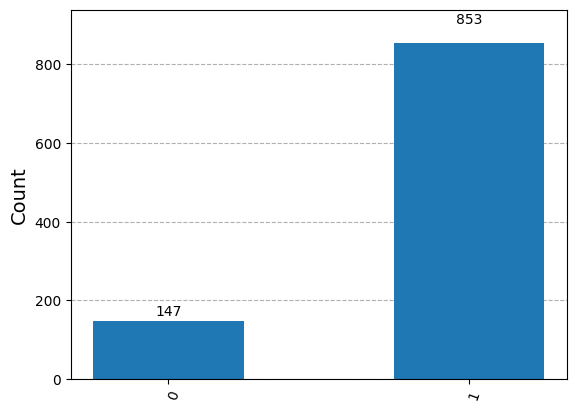

In [79]:
# shown probability
from qiskit.visualization import plot_histogram

statistics = v.sample_counts(1000)
plot_histogram(statistics)

In [31]:
# operators and statevectors
from qiskit.quantum_info import Operator

Y = Operator([[0, -1.0j], [1.0j, 0]])
H = Operator([[1 / sqrt(2), 1 / sqrt(2)], [1 / sqrt(2), -1 / sqrt(2)]])
S = Operator([[1, 0], [0, 1.0j]])
T = Operator([[1, 0], [0, (1 + 1.0j) / sqrt(2)]])

display(T.draw("latex"))

<IPython.core.display.Latex object>

In [32]:
# apply unitary vector
v = Statevector([1, 0])

v = v.evolve(H)
v = v.evolve(T)
v = v.evolve(H)
v = v.evolve(S)
v = v.evolve(Y)

display(v.draw('latex'))

<IPython.core.display.Latex object>

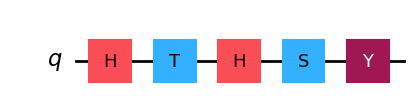

In [36]:
# quantum circuit look ahead
# qc of 5 unitary operations performed on a single qubit
from qiskit import QuantumCircuit

circuit = QuantumCircuit(1)

circuit.h(0)
circuit.t(0)
circuit.h(0)
circuit.s(0)
circuit.y(0)

display(circuit.draw(output = 'mpl'))

In [37]:
# collectiong unitary matrix data from circuit
display(Operator.from_circuit(circuit).draw('latex'))

<IPython.core.display.Latex object>

In [39]:
# evolving state mid circuit
ket0 = Statevector([1,0])
v = ket0.evolve(circuit)
display(v.draw('latex'))

<IPython.core.display.Latex object>

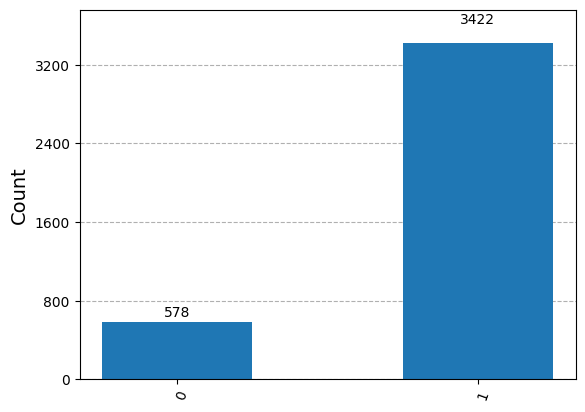

In [41]:
# simulation of standard basis measurement n times
# fresh state each time
n = 4000
statistics = v.sample_counts(n)
display(plot_histogram(statistics))

MULTIPLE SYSTEMS:

In [43]:
# statevector tensor method (returns tensor product (cross))
zero = Statevector.from_label('0')
one = Statevector.from_label('1')
psi = zero.tensor(one)
display(psi.draw('latex'))

<IPython.core.display.Latex object>

In [46]:
# example tensor of +i -i
plus = Statevector.from_label('+')
minus_i = Statevector.from_label('1')
phi = plus.tensor(minus_i)
display(phi.draw('latex'))

<IPython.core.display.Latex object>

In [47]:
# operator also has tensor method
H = Operator.from_label("H")
I = Operator.from_label("I")
X = Operator.from_label("X")
display(H.tensor(I).draw("latex"))
display(H.tensor(I).tensor(X).draw("latex"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [52]:
# partial measurments
# expect different outputs 
w = Statevector([0, 1, 1, 0, 1, 0, 0, 0] / sqrt(3))
display(w.draw("latex"))

result, state = w.measure([0])
print(f"Measured: {result}\nState after measurement:")
display(state.draw("latex"))

result, state = w.measure([0,1])
print(f"Measured: {result}\nState after measurement:")
display(state.draw("latex"))

<IPython.core.display.Latex object>

Measured: 0
State after measurement:


<IPython.core.display.Latex object>

Measured: 10
State after measurement:


<IPython.core.display.Latex object>

QUANTUM CIRCUITS:

In [53]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import Operator
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

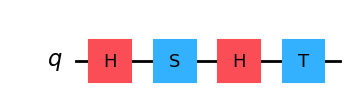

In [54]:
circuit = QuantumCircuit(1)
circuit.h(0)
circuit.s(0)
circuit.h(0)
circuit.t(0)

display(circuit.draw(output="mpl"))

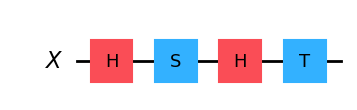

In [57]:
X = QuantumRegister(1, "X")
circuit = QuantumCircuit(X)
circuit.h(X)
circuit.s(X)
circuit.h(X)
circuit.t(X)

display(circuit.draw(output="mpl"))

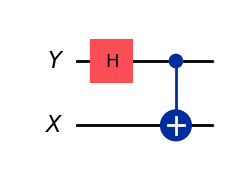

<IPython.core.display.Latex object>

In [58]:
X = QuantumRegister(1, "X")
Y = QuantumRegister(1, "Y")
circuit = QuantumCircuit(Y,X)
circuit.h(Y)
circuit.cx(Y, X)

display(circuit.draw(output="mpl"))
display(Operator.from_circuit(circuit).draw("latex"))

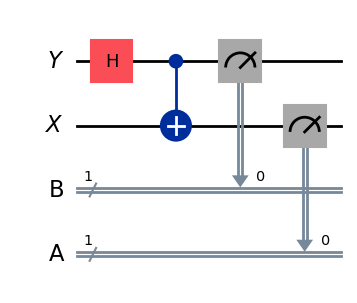

In [59]:
# A,B classical bits
X = QuantumRegister(1, "X")
Y = QuantumRegister(1, "Y")
A = ClassicalRegister(1, "A")
B = ClassicalRegister(1, "B")

circuit = QuantumCircuit(Y, X, B, A)
circuit.h(Y)
circuit.cx(Y, X)
circuit.measure(Y, B)
circuit.measure(X, A)

display(circuit.draw(output="mpl"))

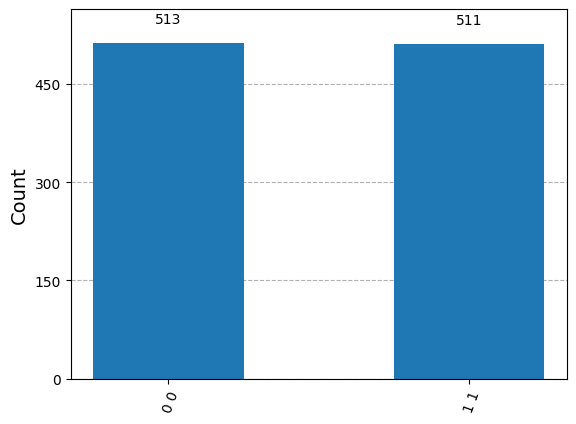

In [60]:
# aer simulation/ measurments
result = AerSimulator().run(circuit).result()
statistics = result.get_counts()
display(plot_histogram(statistics))

ENTANGLEMENT IN ACTION:

In [61]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, array_to_latex
from qiskit.result import marginal_distribution
from qiskit.circuit.library import UGate
from numpy import pi, random

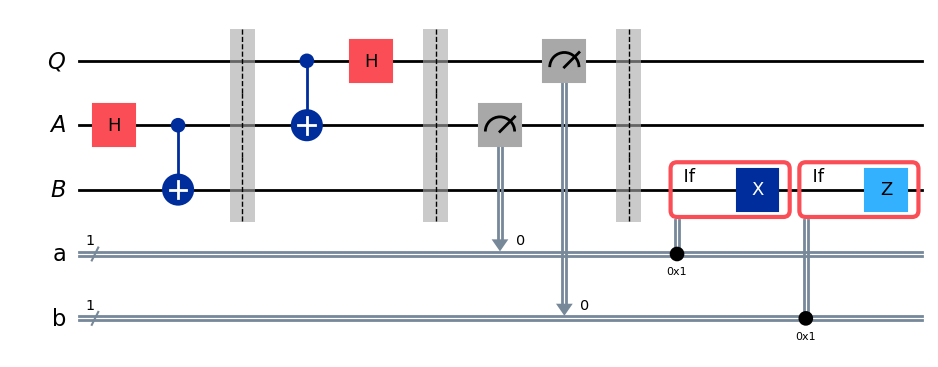

In [63]:
qubit = QuantumRegister(1, 'Q')
ebit0 = QuantumRegister(1, 'A')
ebit1 = QuantumRegister(1, 'B')
a = ClassicalRegister(1, 'a')
b = ClassicalRegister(1, 'b')

protocol = QuantumCircuit(qubit, ebit0, ebit1, a, b)

# prep ebit used for teleportation
protocol.h(ebit0)
protocol.cx(ebit0, ebit1)
protocol.barrier()

# alice's operations
protocol.cx(qubit, ebit0)
protocol.h(qubit)
protocol.barrier()

# alice measures and sends classical bits to Bob
protocol.measure(ebit0, a)
protocol.measure(qubit, b)
protocol.barrier()

# bob uses classical bit to apply gates (conditionally)
with protocol.if_test((a, 1)):
    protocol.x(ebit1)
with protocol.if_test((b, 1)):
    protocol.z(ebit1)

display(protocol.draw(output='mpl'))

In [64]:
# randomly choose unitary qubit gate
random_gate = UGate(
    theta=random.random() * 2 * pi,
    phi=random.random() * 2 * pi,
    lam=random.random() * 2 * pi
)

display(array_to_latex(random_gate.to_matrix()))

<IPython.core.display.Latex object>

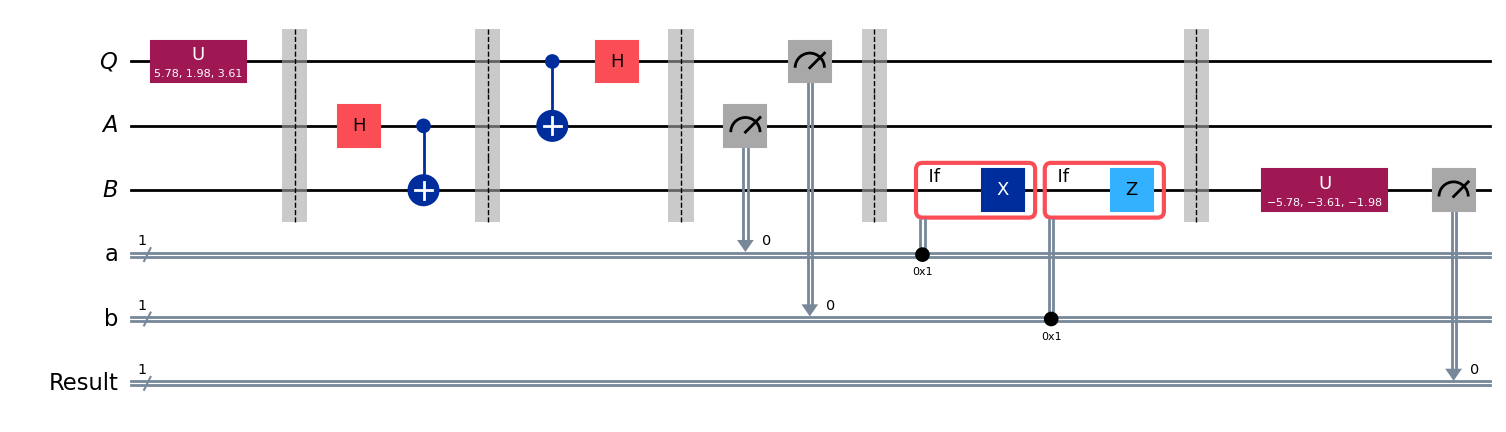

In [66]:
# creating a new circuit with same bits and qubits 
# used in teleportation protocol

test = QuantumCircuit(qubit, ebit0, ebit1, a, b)

# start with random gate on Q
test.append(random_gate, qubit)
test.barrier()

# append whole teleportation protocol from above
test = test.compose(protocol)
test.barrier()

# apply inverse of random unitary to B and measure
test.append(random_gate.inverse(), ebit1)
result = ClassicalRegister(1, 'Result')
test.add_register(result)
test.measure(ebit1, result)

display(test.draw(output='mpl'))

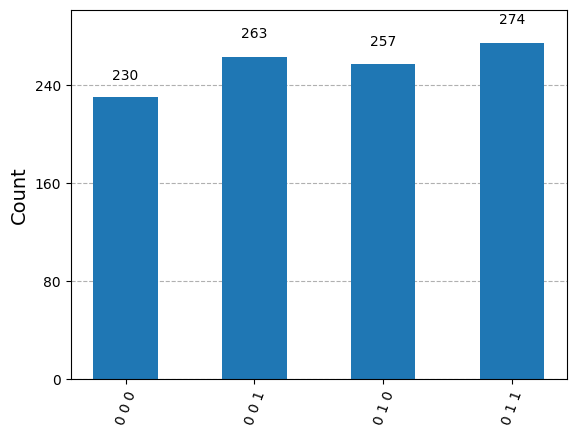

In [67]:
# aer simulation
# to observe stats for all 3 classical bits

result = AerSimulator().run(test).result()
statistics = result.get_counts()
display(plot_histogram(statistics))

SUPERDENSE CODING

In [75]:
# specify circuit (arbitrary choice for now)
c = '1'
d = '0'

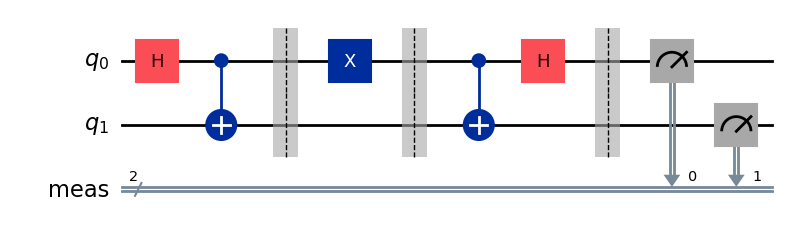

In [76]:
# build circuit 
protocol = QuantumCircuit(2)

# prep ebit for superdense coding
protocol.h(0)
protocol.cx(0,1)
protocol.barrier()

# alice's operations
if d == '1':
    protocol.z(0)
if c == '1':
    protocol.x(0)
protocol.barrier()

# bob's actions
protocol.cx(0,1)
protocol.h(0)
protocol.measure_all()

display(protocol.draw(output='mpl'))

measured 10 with frequency 1024


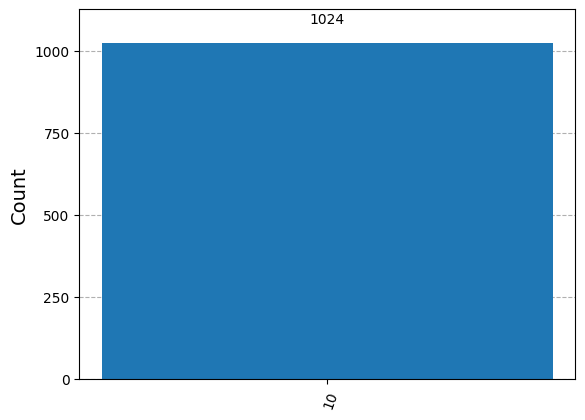

In [77]:
# run aer with expected output 
result = AerSimulator().run(protocol).result()
statistics = result.get_counts()

for outcome, frequency in statistics.items():
    print(f'measured {outcome} with frequency {frequency}')

display(plot_histogram(statistics))

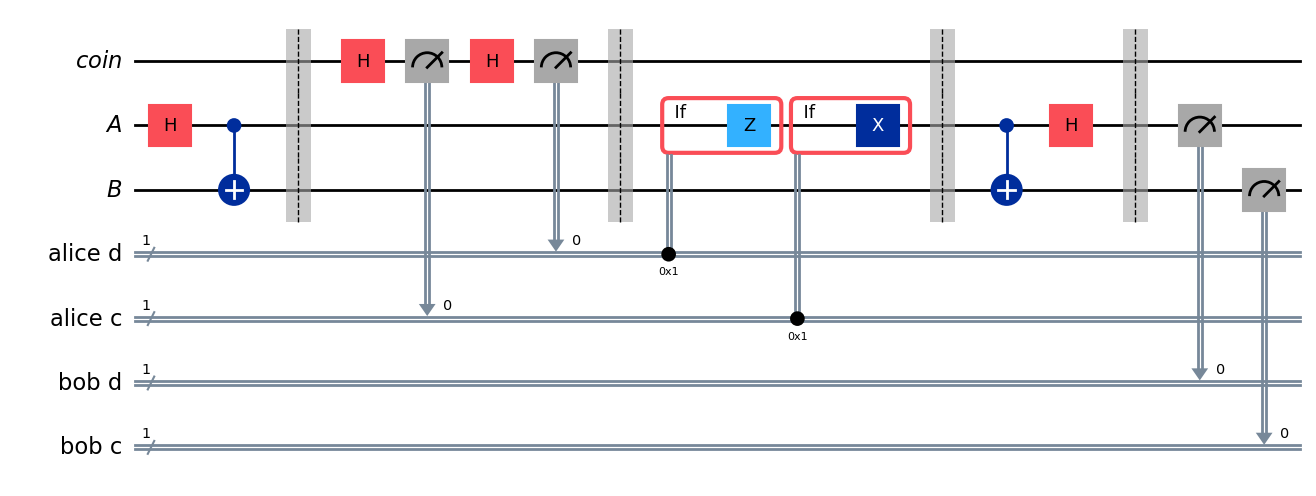

In [80]:
# random bit generator (flipping fair coins) 
# using it to randomaly choose c and d
rbg = QuantumRegister(1, 'coin')
ebit0 = QuantumRegister(1, 'A')
ebit1 = QuantumRegister(1, 'B')

Alice_c = ClassicalRegister(1, 'alice c')
Alice_d = ClassicalRegister(1, 'alice d')

test = QuantumCircuit(rbg, ebit0, ebit1, Alice_d, Alice_c)

# initialize the ebit
test.h(ebit0)
test.cx(ebit0, ebit1)
test.barrier()

# use the 'coin' qubit twice to generate alice's bits (c and d)
test.h(rbg)
test.measure(rbg, Alice_c)
test.h(rbg)
test.measure(rbg, Alice_d)
test.barrier()

# protocol runs, starting with alice's actions
# depending on her bits
with test.if_test((Alice_d,1), label = 'Z'):
    test.z(ebit0)
with test.if_test((Alice_c,1), label = 'X'):
    test.x(ebit0)
test.barrier()

test.cx(ebit0, ebit1)
test.h(ebit0)
test.barrier()

Bob_c = ClassicalRegister(1, 'bob c')
Bob_d = ClassicalRegister(1, 'bob d')
test.add_register(Bob_d)
test.add_register(Bob_c)
test.measure(ebit0, Bob_d)
test.measure(ebit1, Bob_c)

display(test.draw(output='mpl'))



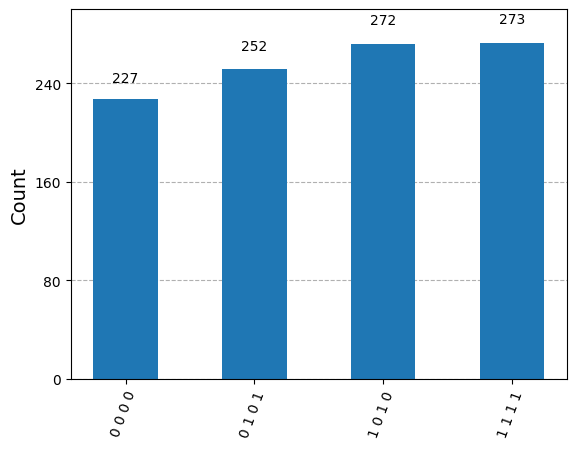

In [83]:
# alice and bob's classical bits should always agree (0101,1111)
result = AerSimulator().run(test).result()
statistics = result.get_counts()
display(plot_histogram(statistics))

CHSH Game:

In [84]:
def chsh_game(strategy):
    '''function runs the CHSH game, using the stratagy,
    a function from two bits to two bits. returning 1 
    for a win and 0 for a loss'''
    
    # choose x and y randomly
    x, y = random.randint(0,2), random.randint(0,2)

    # use strat to determine a and b
    a, b = strategy(x, y)

    # decide if strat wins or loses
    if (a != b) == (x & y):
        return 1 # win
    return 0 # lose

In [85]:
def chsh_circuit(x, y):
    '''function creates a quantum circuit implementing the quantum
    strategy described above (including e-bit prep)'''
    
    qc = QuantumCircuit(2,2)

    # prep e-bit
    qc.h(0)
    qc.cx(0,1)
    qc.barrier()

    # alice actions
    if x == 0:
        # built in R_y(theta) func
        qc.ry(0,0)
    else:
        qc.ry(-pi/2,0)
    qc.measure(0,0)

    # bob actions
    if y == 0:
        qc.ry(-pi/4,1)
    else:
        qc.ry(pi/4,1)
    qc.measure(1,1)

    return qc

(x,y) = (0,0)


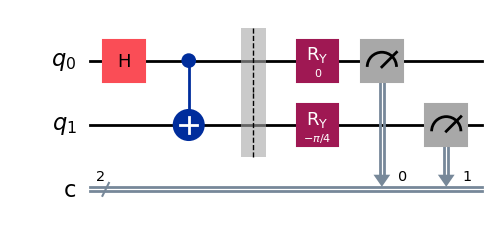

(x,y) = (0,1)


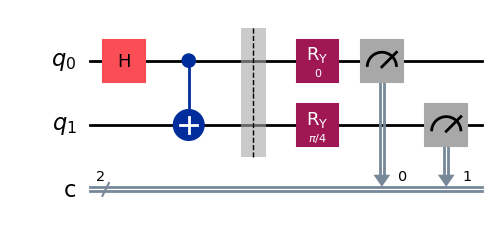

(x,y) = (1,0)


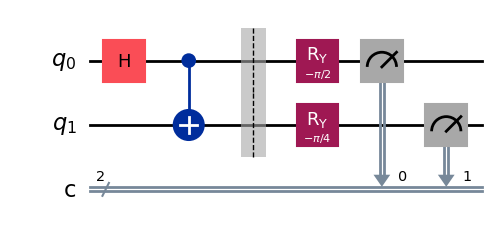

(x,y) = (1,1)


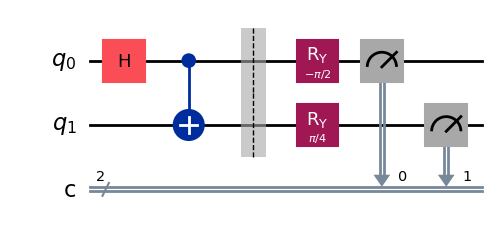

In [86]:
# draw the four possible circuits
print("(x,y) = (0,0)")
display(chsh_circuit(0, 0).draw(output="mpl"))

print("(x,y) = (0,1)")
display(chsh_circuit(0, 1).draw(output="mpl"))

print("(x,y) = (1,0)")
display(chsh_circuit(1, 0).draw(output="mpl"))

print("(x,y) = (1,1)")
display(chsh_circuit(1, 1).draw(output="mpl"))

In [87]:
# job created using aer simulation
# runs circuit once for a given input pair (x,y)
def quantum_strategy(x,y):
    '''function runs qc defined above, once and returns measurment resutl'''
    
    # setting 'shots=1' to run circuit once
    result = AerSimulator().run(chsh_circuit(x, y), shots = 1).result()
    statistics = result.get_counts()

    # determine the output of bits and return them
    bits = list(statistics.keys())[0]
    a, b = bits[0], bits[1]
    return a, b

In [88]:
# run game n times
# compute fraction of time the quantum strategy wins
n_games = 1000
total_score = 0

for _ in range(n_games):
    total_score += chsh_game(quantum_strategy)

print('fraction of games won:', total_score/n_games)

fraction of games won: 0.869


In [89]:
# defining classical strategy
def classical_strategy(x, y):
    '''example of classical strat for CHSH game.'''
    
    # alice answer
    if x == 0:
        a = 0
    elif x == 1:
        a = 1

    # bob answer
    if y == 0:
        b = 1
    elif y == 1:
        b = 0

    return a, b

In [91]:
# run game n times
# compute fraction of time the classical strategy wins
n_games = 1000
total_score = 0

for _ in range(n_games):
    total_score += chsh_game(classical_strategy)

print('fraction of games won:', total_score/n_games)

fraction of games won: 0.734
